# Organism WRONG WRONG WRONG
In the simplest model, there is only a class for the **Organism**. Each organism reproduces asexually with the parameter that an individual's population $f(t)$ is governed by $f(t) = f(0)e^{st}$ where $s$ is a fitness parameter determined by an organism's individual fitness. Some individuals will acquire a beneficial mutation with probability $U_b$, increasing their fitness, whereas others may acquire a detrimental mutation with probability $U_d$. To implement this mechanistically, *while keeping population size constant*, we first convert the fitness $s$ to an expected number of offspring for each organism.

In [50]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt

class Population:
    def __init__(self, Ub, Ud, size):
        """
        Creates Population (see Organism specs)
        """
        self.Ub = Ub
        self.Ud = Ud
        self.gens = [[]]
        self.size = size
        
        for i in range(self.size):
            # self.gens[0].append(Organism(np.random.random(), Ub, Ud, [len(self.gens)-1, i]))
            self.gens[0].append(Organism(0.5, Ub, Ud, [len(self.gens)-1, i]))
            
    def __str__(self):
        return f'population with size {len(self.gens[-1])}, {len(self.gens)} generations, Ub {self.Ub}, Ud {self.Ud}'
            
    def reproduce(self):
        # exponential
        self.gens.append([])
        weights = [math.exp(org.s) for org in self.gens[-2]] # issue TODO
        
        for i in range(self.size):
            choice = random.choices(self.gens[-2], weights=weights)[0]
            self.gens[-1].append(choice.reproduce([len(self.gens)-1, i]))
    
    def selection(self):
        # poissonianally select

class Organism:
    def __init__(self, s, Ub, Ud, index, parent=None):
        """
        Creates Organism object with fitness s, beneficial mutation rate Ub, detrimental mutation rate Ud, and
        a parent, which is either another Organism object or None if in the parent generation
        index = [gen, number in gen]
        """
        self.s = s
        self.Ub = Ub
        self.Ud = Ud
        self.index = index
        self.parent = parent
        self.children = []
    
    def __str__(self):
        return f'organism {self.index}'
        
    def reproduce(self, index):
        """
        reproduces and gives mutation accordingly
        adds resultant Organism to self.children
        returns resultant Organism
        """
        
        if np.random.random() < self.Ub:
            self.s += self.s * 0.01
        
        if np.random.random() < self.Ud:
            self.s -= self.s * 0.01
        
        child = Organism(self.s, self.Ub, self.Ud, index, parent=self)
        self.children.append(child)
        
        return child

In [51]:
from pprint import pprint
import time

start_time = time.time()

bacteria = Population(0.01, 0.02, 50)

num_gens = 30
for i in range(num_gens):
    bacteria.reproduce()

print(bacteria)
print(np.asarray(bacteria.gens).shape)
# for gen in bacteria.gens:
#     pprint([str(org) for org in gen])
    
print("--- %s seconds ---" % (time.time() - start_time))
# 1000 gens on order of seconds with population size of 10^7 or 10^9
# get rid of dead lineages (DONE)
# keep track of all organisms with the same fitness (only works with uniform fitness adjustments) rather than individual fitnesses

# let exponential growth happen
# randomly sample individuals from "flask 1" (exponential growth) to create "flask 2" population, holding it constant
# Poisson randomly sample to tell you number of organisms from each lineage to go to next generation

# exponential growth * constant factor to keep population constant
# as population increases in fitness, you can shift the population fitnesses to be relative to the mean, normalizing the fitnesses
# keeps fitnesses low in the exponential, very important

population with size 50, 31 generations, Ub 0.01, Ud 0.02
(31, 50)
--- 0.019270896911621094 seconds ---


ancestor organism [0, 0], immediate children [<__main__.Organism object at 0x16338ca90>]


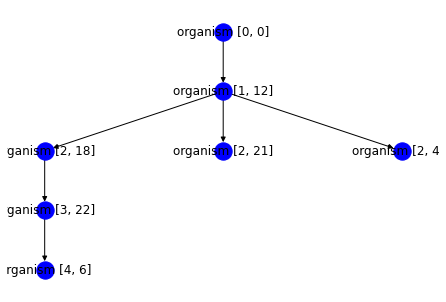

ancestor organism [0, 1], immediate children [<__main__.Organism object at 0x162841250>, <__main__.Organism object at 0x16338cee0>]


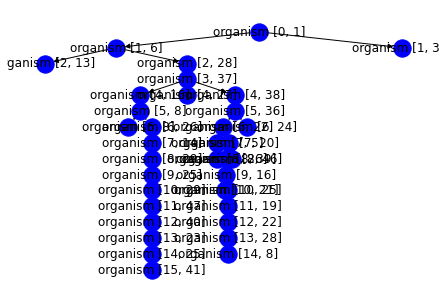

ancestor organism [0, 2], immediate children []


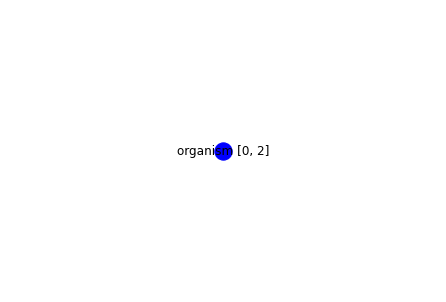

ancestor organism [0, 3], immediate children []


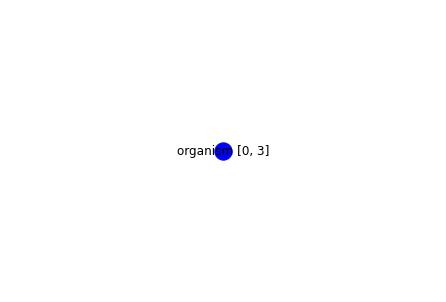

ancestor organism [0, 4], immediate children [<__main__.Organism object at 0x1658f2fd0>, <__main__.Organism object at 0x16338c4f0>]


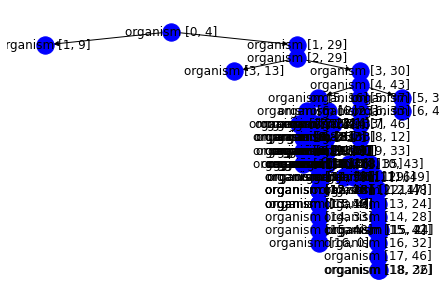

ancestor organism [0, 5], immediate children [<__main__.Organism object at 0x163df3100>, <__main__.Organism object at 0x16338cd60>]


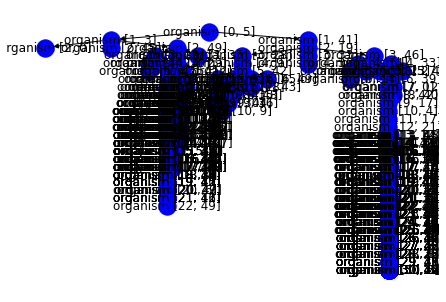

ancestor organism [0, 6], immediate children [<__main__.Organism object at 0x16338c070>]


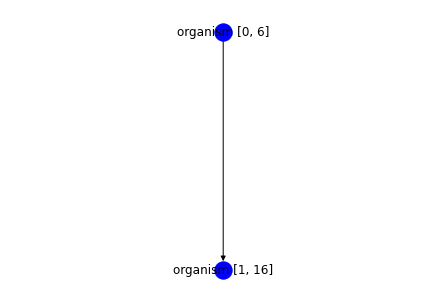

ancestor organism [0, 7], immediate children []


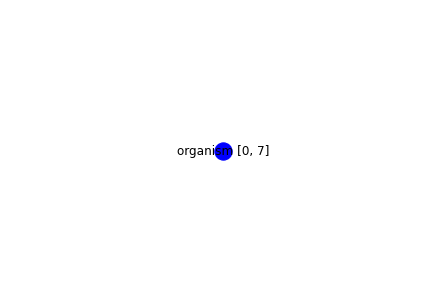

ancestor organism [0, 8], immediate children []


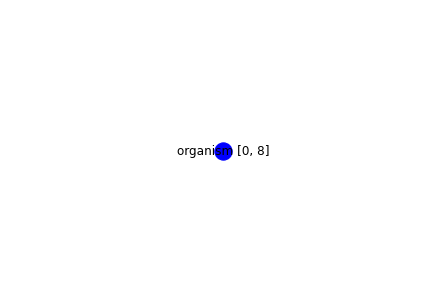

ancestor organism [0, 9], immediate children [<__main__.Organism object at 0x16338cac0>]


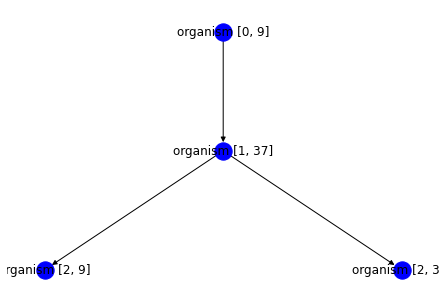

ancestor organism [0, 10], immediate children []


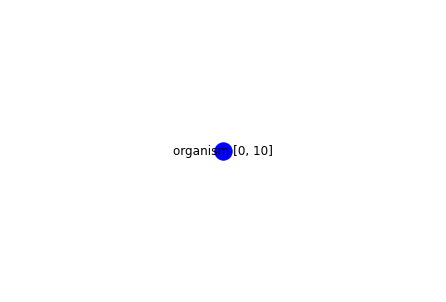

ancestor organism [0, 11], immediate children []


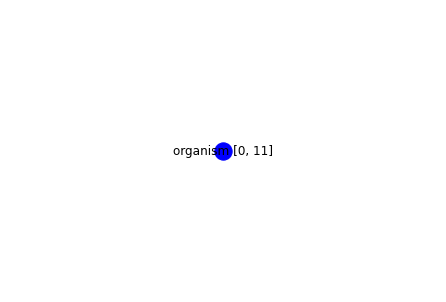

ancestor organism [0, 12], immediate children []


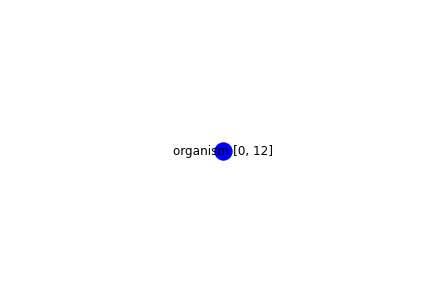

ancestor organism [0, 13], immediate children [<__main__.Organism object at 0x16338c340>]


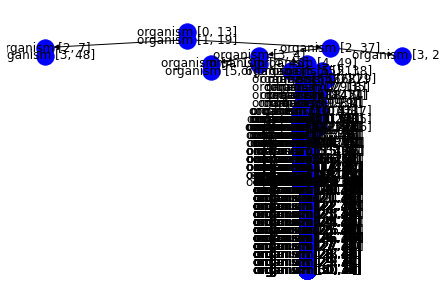

ancestor organism [0, 14], immediate children []


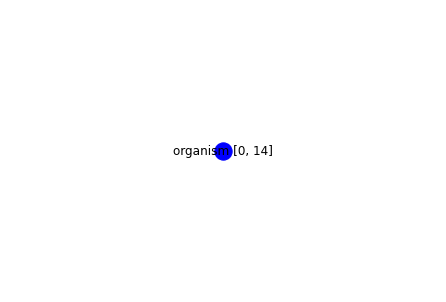

ancestor organism [0, 15], immediate children [<__main__.Organism object at 0x16338cf10>, <__main__.Organism object at 0x16338ce20>]


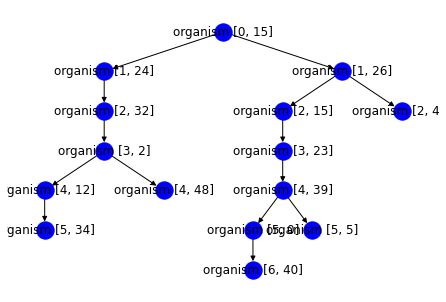

ancestor organism [0, 16], immediate children [<__main__.Organism object at 0x16338c2b0>]


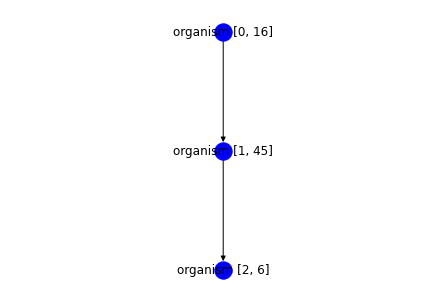

ancestor organism [0, 17], immediate children [<__main__.Organism object at 0x1658d21f0>]


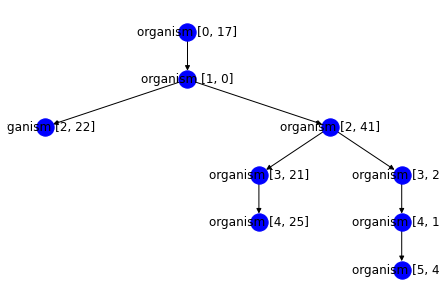

ancestor organism [0, 18], immediate children [<__main__.Organism object at 0x16338ce50>]


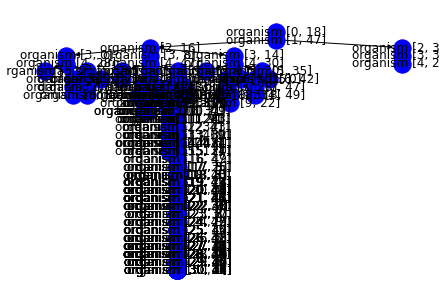

ancestor organism [0, 19], immediate children [<__main__.Organism object at 0x16338caf0>]


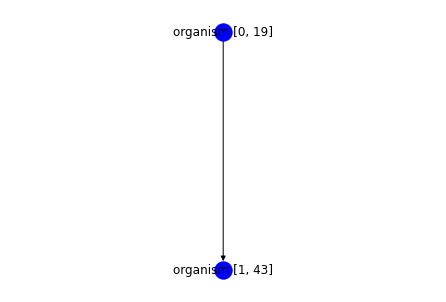

ancestor organism [0, 20], immediate children [<__main__.Organism object at 0x162fdd700>, <__main__.Organism object at 0x16469ae50>]


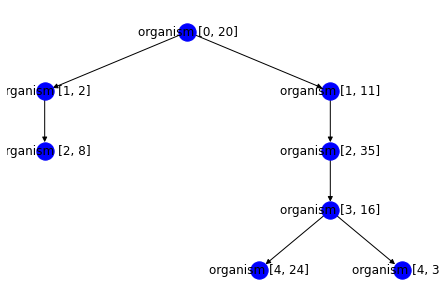

ancestor organism [0, 21], immediate children [<__main__.Organism object at 0x16338c0a0>]


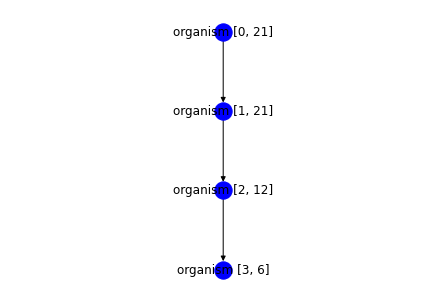

ancestor organism [0, 22], immediate children [<__main__.Organism object at 0x16338c550>]


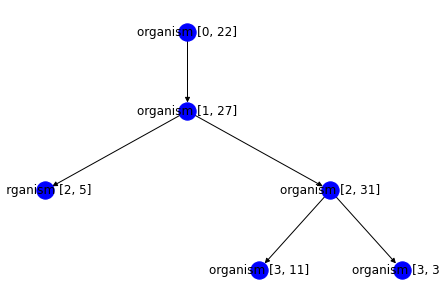

ancestor organism [0, 23], immediate children [<__main__.Organism object at 0x163df3250>]


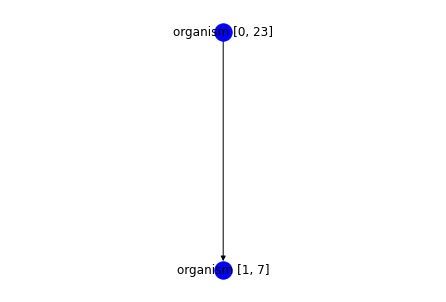

ancestor organism [0, 24], immediate children []


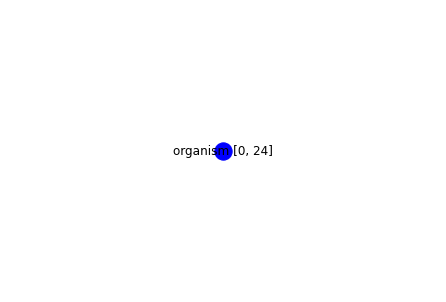

ancestor organism [0, 25], immediate children [<__main__.Organism object at 0x16338cd30>]


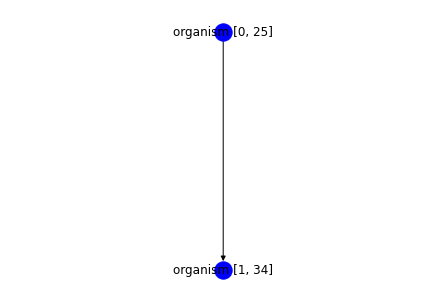

ancestor organism [0, 26], immediate children [<__main__.Organism object at 0x16338c1f0>, <__main__.Organism object at 0x16338cf40>, <__main__.Organism object at 0x16497c1c0>]


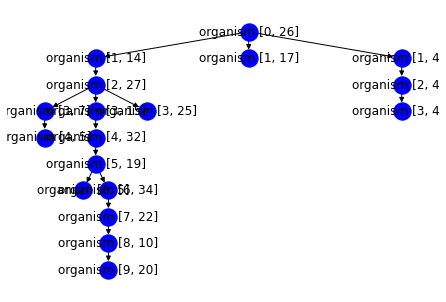

ancestor organism [0, 27], immediate children []


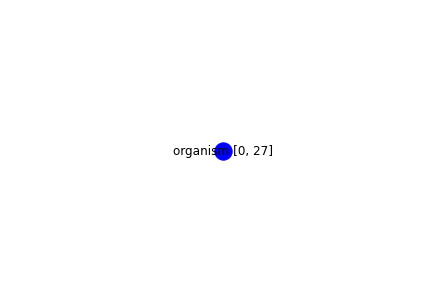

ancestor organism [0, 28], immediate children []


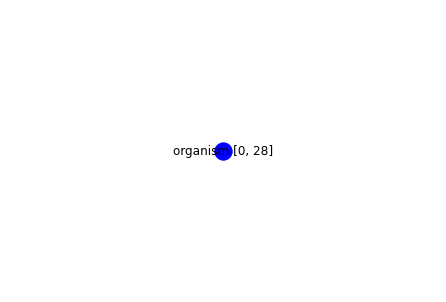

ancestor organism [0, 29], immediate children []


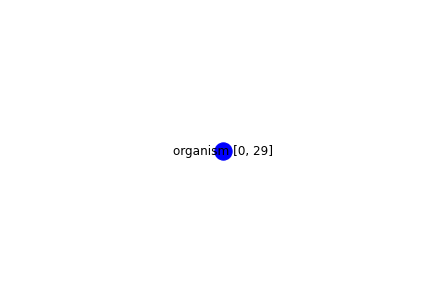

ancestor organism [0, 30], immediate children [<__main__.Organism object at 0x16338c580>, <__main__.Organism object at 0x163d24e20>]


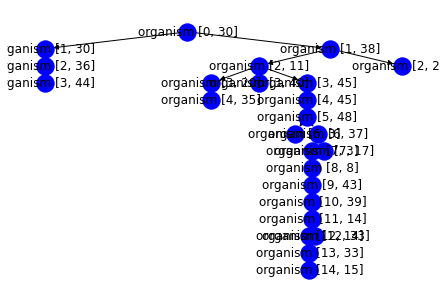

ancestor organism [0, 31], immediate children [<__main__.Organism object at 0x16497c520>]


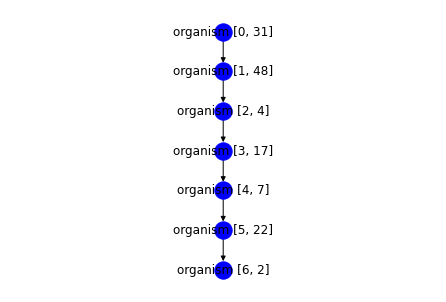

ancestor organism [0, 32], immediate children [<__main__.Organism object at 0x16338cb50>]


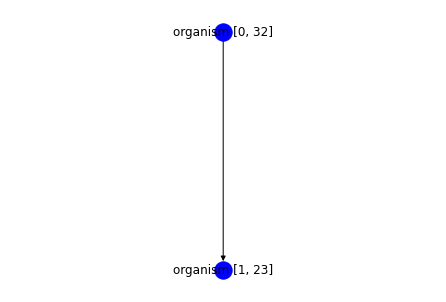

ancestor organism [0, 33], immediate children []


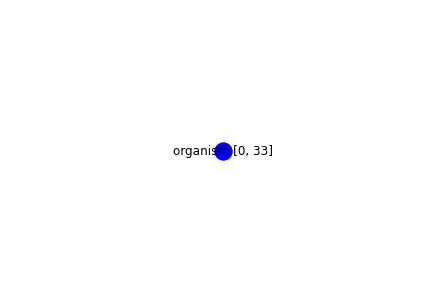

ancestor organism [0, 34], immediate children [<__main__.Organism object at 0x16338cd00>]


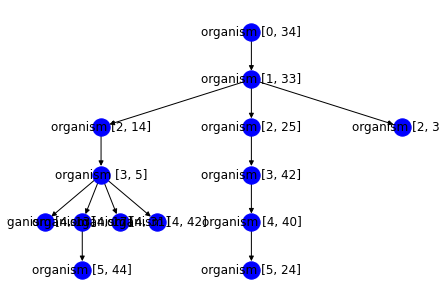

ancestor organism [0, 35], immediate children []


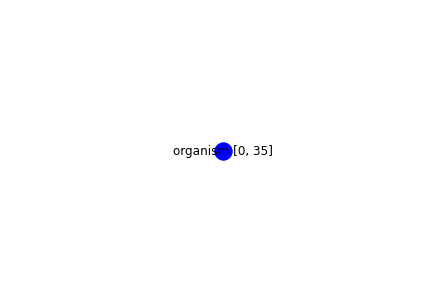

ancestor organism [0, 36], immediate children [<__main__.Organism object at 0x163df3280>, <__main__.Organism object at 0x16338c250>, <__main__.Organism object at 0x16497c160>]


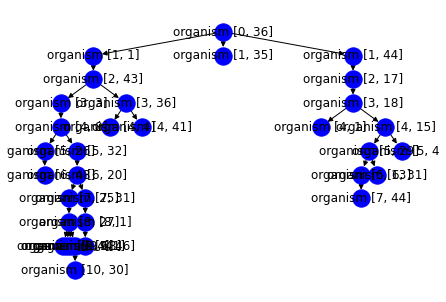

ancestor organism [0, 37], immediate children []


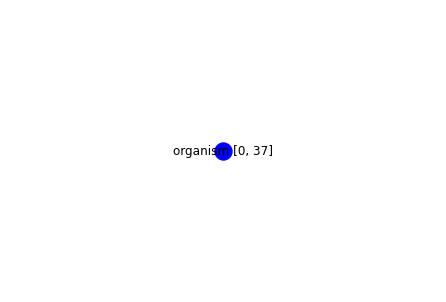

ancestor organism [0, 38], immediate children []


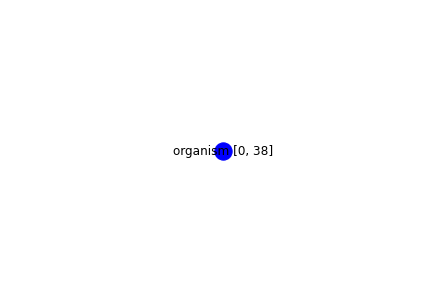

ancestor organism [0, 39], immediate children []


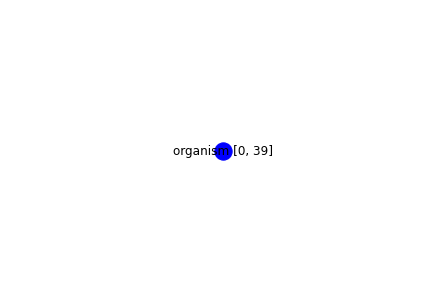

ancestor organism [0, 40], immediate children [<__main__.Organism object at 0x16338cc40>]


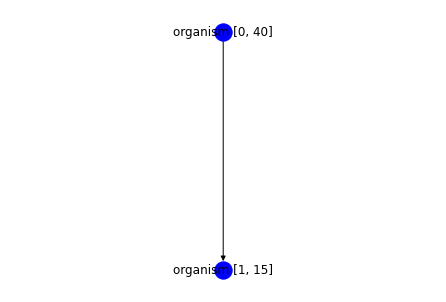

ancestor organism [0, 41], immediate children [<__main__.Organism object at 0x162841190>, <__main__.Organism object at 0x16338c3a0>]


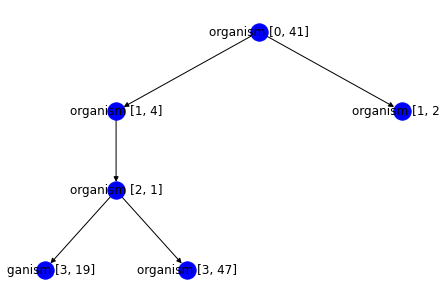

ancestor organism [0, 42], immediate children [<__main__.Organism object at 0x16338c6d0>, <__main__.Organism object at 0x16338ce80>, <__main__.Organism object at 0x163d24190>]


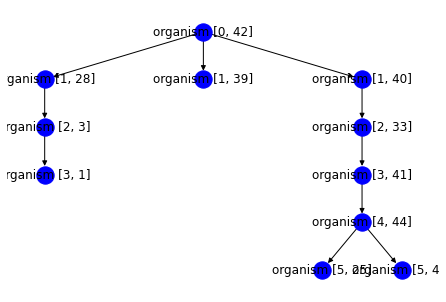

ancestor organism [0, 43], immediate children [<__main__.Organism object at 0x163df3220>, <__main__.Organism object at 0x16338c4c0>, <__main__.Organism object at 0x16497c070>]


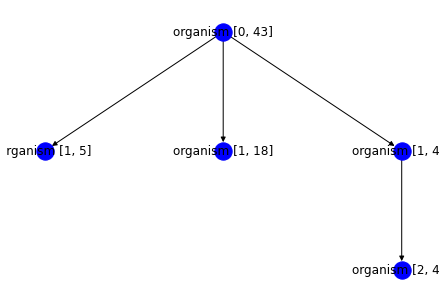

ancestor organism [0, 44], immediate children [<__main__.Organism object at 0x16338c5e0>]


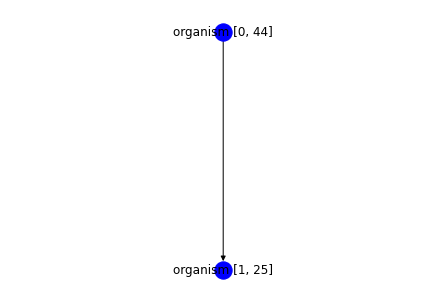

ancestor organism [0, 45], immediate children [<__main__.Organism object at 0x16338c610>]


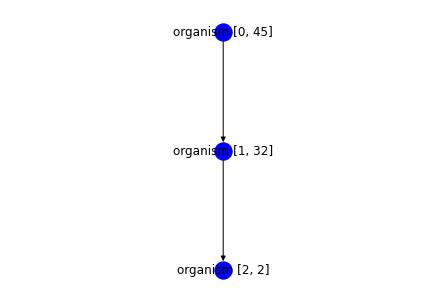

ancestor organism [0, 46], immediate children [<__main__.Organism object at 0x162841400>, <__main__.Organism object at 0x16338c730>, <__main__.Organism object at 0x16338c430>]


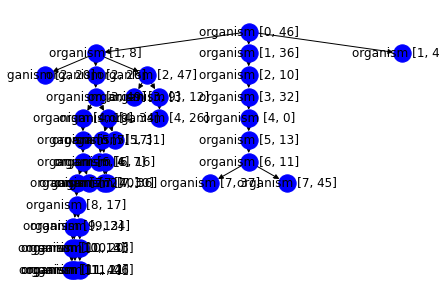

ancestor organism [0, 47], immediate children []


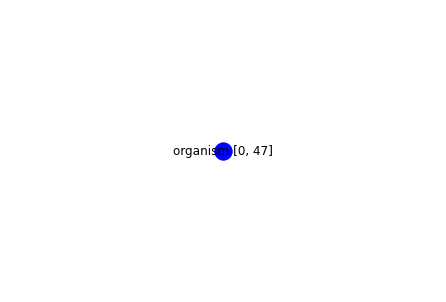

ancestor organism [0, 48], immediate children [<__main__.Organism object at 0x162fdd4f0>]


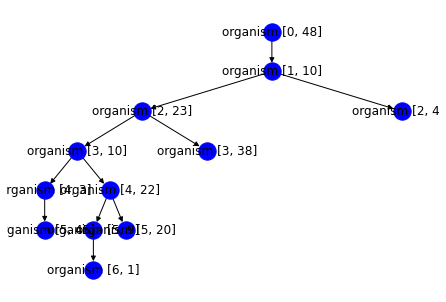

ancestor organism [0, 49], immediate children [<__main__.Organism object at 0x16338c0d0>, <__main__.Organism object at 0x16338c3d0>]


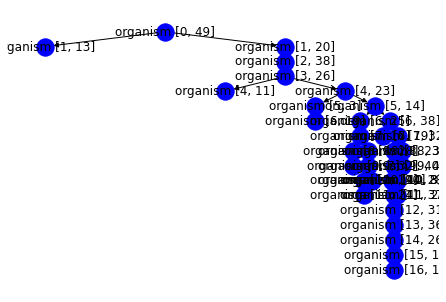

--- 64.6457998752594 seconds ---


<Figure size 432x288 with 0 Axes>

In [53]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

def add_children_to_graph(ancestor, graph):
    if len(ancestor.children) == 0:
        return
    else:
        for child in ancestor.children:
            graph.add_edge(ancestor, child)
            add_children_to_graph(child, graph)

for ancestor in bacteria.gens[0]:
    G = nx.DiGraph()
    
    print(f'ancestor {ancestor}, immediate children {ancestor.children}')

    G.add_node(ancestor)

    add_children_to_graph(ancestor, G)

    nx.draw(G, with_labels=True, pos=hierarchy_pos(G, root=ancestor), node_color = ['blue'])
    plt.show(); plt.figure(); plt.clf()

print("--- %s seconds ---" % (time.time() - start_time))

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.505, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.505, ..., 0.5, 0.5, 0.495],
       ...,
       [0.5, 0.5, 0.5, ..., 0.505, 0.495, 0.5],
       [0.5, 0.505, 0.5, ..., 0.490000995, 0.495, 0.5],
       [0.5, 0.49490100495, 0.495, ..., 0.5, 0.49490100495, 0.5]],
      dtype=object)


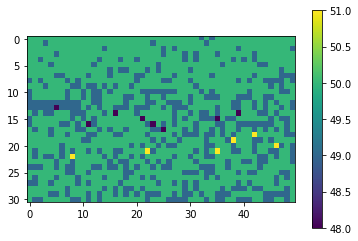

In [54]:
# fitness graphs
fitnesses = np.zeros_like(np.asarray(bacteria.gens))
i = 0
while i < fitnesses.shape[0]:
    j = 0
    while j < fitnesses.shape[1]:
        fitnesses[i][j] += bacteria.gens[i][j].s
        j += 1
    i += 1

pprint(fitnesses)
plottable = (fitnesses*100).astype(int)
plt.imshow(plottable); plt.colorbar(); plt.show()